<a href="https://colab.research.google.com/github/Tarun2901/GUVIDLCourse/blob/main/MPNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Dataset

In [8]:
import sklearn.datasets
import numpy as np

In [9]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [10]:
X = breast_cancer.data
Y = breast_cancer.target

In [11]:
print(X)
print(Y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [12]:
print(X.shape,Y.shape)

(569, 30) (569,)


In [13]:
import pandas as pd

In [14]:
data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)

In [15]:
data['class'] = breast_cancer.target

In [16]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [17]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [18]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [19]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [ ]:
# 0 - Malignant, 1 - Benign
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


# Train test split

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
X = data.drop('class',axis = 1) # Since Y was class values so we remove it
Y = data['class']

In [23]:
type(X)

pandas.core.frame.DataFrame

In [24]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y)

In [ ]:
print(X.shape,Y.shape,X_train.shape, Y_train.shape)

(569, 30) (569,) (512, 30) (512,)


In [ ]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1)

In [ ]:
print(Y.mean(),Y_train.mean(),Y_test.mean())

0.6274165202108963 0.626953125 0.631578947368421


In [ ]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1,stratify = Y)
# Stratify helps in maintaining the ratio between number of ones in the original labels and the number of ones in the test and train data.

In [ ]:
print(X_train.mean(), X_test.mean(),X.mean()) 

In [25]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1,stratify = Y,random_state = 1)
# Due to random state the split will be deterministic

In [26]:
print(Y_test.shape)

(57,)


In [27]:
print(X_test.shape)

(57, 30)


In [28]:
print(X_train.mean(), X_test.mean(),X.mean()) 

mean radius                 14.058656
mean texture                19.309668
mean perimeter              91.530488
mean area                  648.097266
mean smoothness              0.096568
mean compactness             0.105144
mean concavity               0.089342
mean concave points          0.048892
mean symmetry                0.181961
mean fractal dimension       0.062979
radius error                 0.403659
texture error                1.206856
perimeter error              2.861173
area error                  39.935506
smoothness error             0.007067
compactness error            0.025681
concavity error              0.032328
concave points error         0.011963
symmetry error               0.020584
fractal dimension error      0.003815
worst radius                16.194275
worst texture               25.644902
worst perimeter            106.757715
worst area                 871.647852
worst smoothness             0.132592
worst compactness            0.257415
worst concav

In [29]:
print(Y_test.shape)

(57,)


# Binarisation of Input

In [30]:
import matplotlib.pyplot as plt


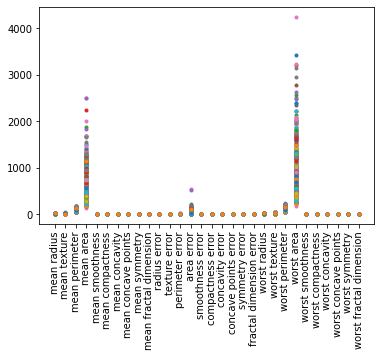

In [31]:
plt.plot(X_train.T,'.')
#Labels are overlapping -> Use xticks
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
X_binarised_3_train = X_train['mean area'].map(lambda x: 0 if x<1000 else 1)

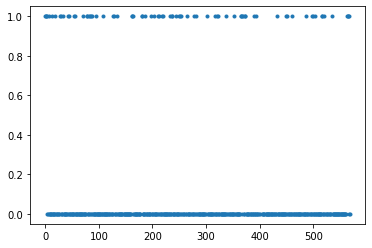

In [ ]:
plt.plot(X_binarised_3_train,'.')

In [32]:
# Now instead of doing it manually for each column(parameter), we will use pandas cut to do it in one go for all the inputs
X_binarised_train = X_train.apply(pd.cut,bins = 2,labels = [1,0])

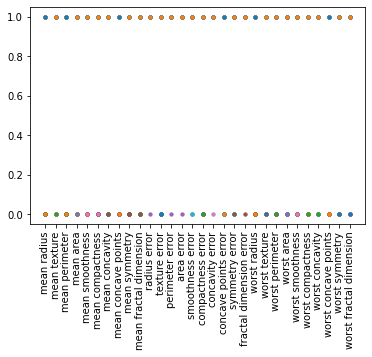

In [33]:
plt.plot(X_binarised_train.T,'.')
#Labels are overlapping -> Use xticks
plt.xticks(rotation = 'vertical')
plt.show()

In [34]:
X_binarised_test = X_test.apply(pd.cut,bins = 2,labels = [1,0])

In [35]:
type(X_binarised_test)

pandas.core.frame.DataFrame

In [36]:
# Convert to numpy arrays
X_binarised_train = X_binarised_train.values
X_binarised_test = X_binarised_test.values
Y_test = Y_test.values

In [37]:
type(X_binarised_test)

numpy.ndarray

# MP Neuron Model

In [38]:
from random import randint

In [39]:
b = 3

i = randint(0,X_binarised_train.shape[0])

print('For row', i)

if(np.sum(X_binarised_train[100,:]>=b)):
  print('MP Neuron inference is malignant')
else:
  print('MP Neuron inference is benign')

if (Y_train[i] == 1):
  print('Ground truth is malignant')
else:
  print('Ground truth is benign')

For row 439
MP Neuron inference is benign
Ground truth is malignant


In [40]:
b = 3

Y_pred_train = []
accurate_rows = 0
for x,y in zip(X_binarised_train,Y_train):
  y_pred = (np.sum(x)>=b)
  Y_pred_train.append(y_pred)
  accurate_rows+= (y == y_pred)

print(accurate_rows,accurate_rows/X_binarised_train.shape[0])

321 0.626953125


In [41]:
for b in range(0,X_binarised_train.shape[1]+1):
  Y_pred_train = []
  accurate_rows = 0
  for x,y in zip(X_binarised_train,Y_train):
    y_pred = (np.sum(x)>=b)
    Y_pred_train.append(y_pred)
    accurate_rows+= (y == y_pred)

  print(b,accurate_rows/X_binarised_train.shape[0])

0 0.626953125
1 0.626953125
2 0.626953125
3 0.626953125
4 0.626953125
5 0.626953125
6 0.626953125
7 0.626953125
8 0.626953125
9 0.626953125
10 0.626953125
11 0.626953125
12 0.626953125
13 0.626953125
14 0.630859375
15 0.6328125
16 0.642578125
17 0.6484375
18 0.65625
19 0.6640625
20 0.671875
21 0.6875
22 0.701171875
23 0.724609375
24 0.755859375
25 0.78515625
26 0.818359375
27 0.845703125
28 0.849609375
29 0.814453125
30 0.759765625


In [42]:
# Why is the model doing bad at all values of b apart from 0?
# When it is benign, the feature's mean value is more as compared to the malignant case and 
# due to binarization the values which belong to the class label 0 have been assigned 1 by 
# the virtue of the parameters/features having values greater than the threshold for label 1
# SOLN - We will reverse the class labels

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
b = 28
Y_pred_test = []

for x in X_binarised_test:
  y_pred = (np.sum(x)>=b)
  Y_pred_test.append(y_pred)

Y_pred_test = np.array(Y_pred_test)
print(Y_pred_test.shape)
print(Y_train.shape)

accuracy = accuracy_score(Y_pred_test,Y_test)
print(b,accuracy)

(57,)
(512,)
28 0.7894736842105263


# MP Neuron Class


In [4]:
class MPNeuron:
  def __init__(self):
    self.b = None
  
  def model(self,x):
    return(sum(x)>=self.b)
  
  def predict(self,X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
  
  def fit(self,X,Y):
    accuracy = {} 

    for b in range(X.shape[1]+1):
      self.b = b
      Y_pred = self.predict(X)
      accuracy[b] = accuracy_score(Y_pred,Y)
    
    best_b = max(accuracy,key = accuracy.get)
    self.b = best_b
    print('Optimal value of b is',best_b)
    print('Highest accuracy is', accuracy[best_b])

In [45]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_binarised_train,Y_train)

Optimal value of b is 28
Highest accuracy is 0.849609375


In [46]:
Y_test_pred = mp_neuron.predict(X_binarised_test)
accuracy_test = accuracy_score(Y_test_pred,Y_test)
print(accuracy_test)

0.7894736842105263
